In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('DisneylandReviews.csv',encoding="latin-1")

In [3]:
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
print("Number of row in data :{}".format(data.shape[0]))

Number of row in data :42656


In [5]:
data.shape

(42656, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [7]:
data["Rating"].value_counts(ascending=True)

1     1499
2     2127
3     5109
4    10775
5    23146
Name: Rating, dtype: int64

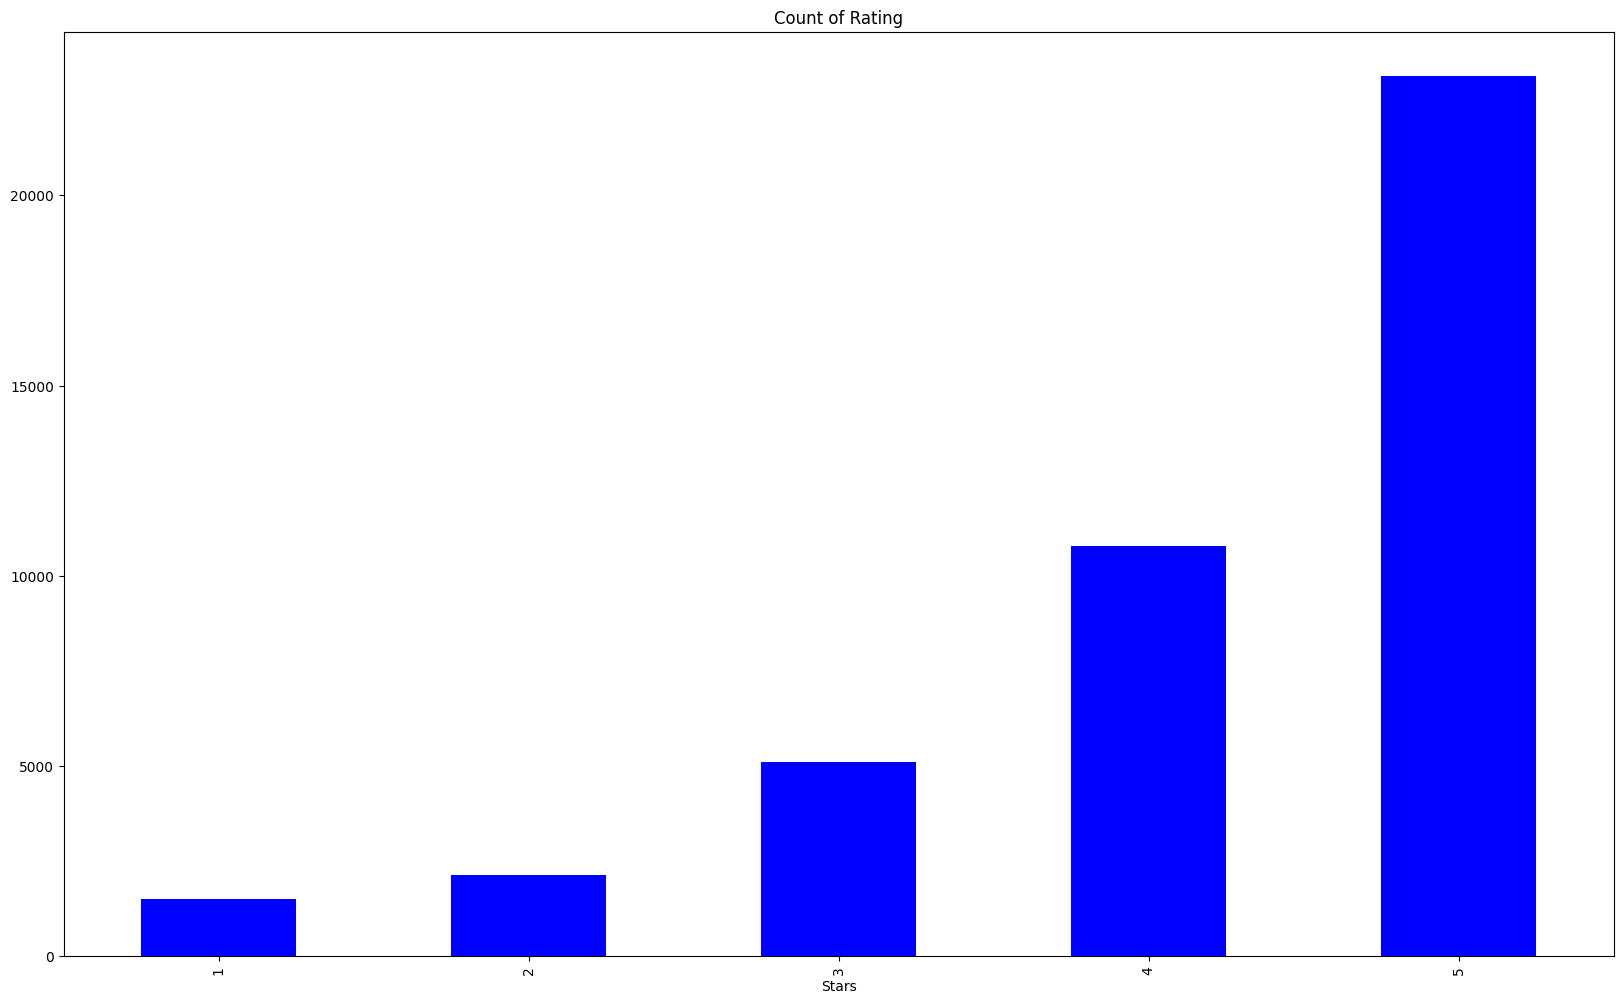

In [8]:
import matplotlib.pyplot as plt 
data["Rating"].value_counts(ascending=True).plot(kind="bar",title="Count of Rating",
                                                 figsize=(20,12),color="Blue",xlabel="Stars")

plt.show()


In [9]:
import seaborn as sns 

<AxesSubplot:xlabel='count', ylabel='Branch'>

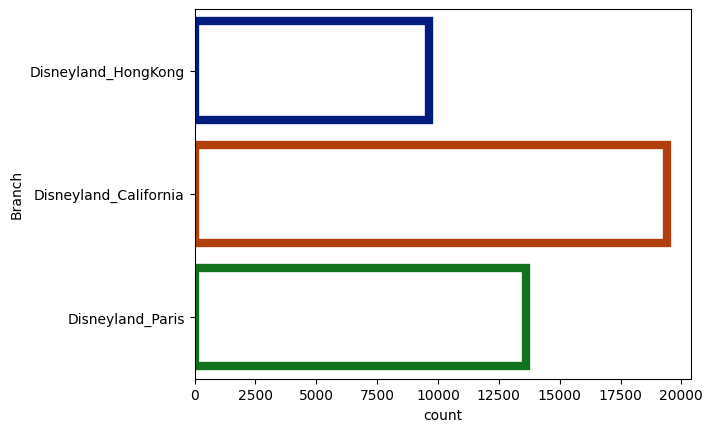

In [10]:
#count plot
sns.countplot(y="Branch",data=data, facecolor=(1,1,1,1),linewidth=6 
              ,edgecolor =sns.color_palette("dark",4))

<AxesSubplot:xlabel='Rating', ylabel='Branch'>

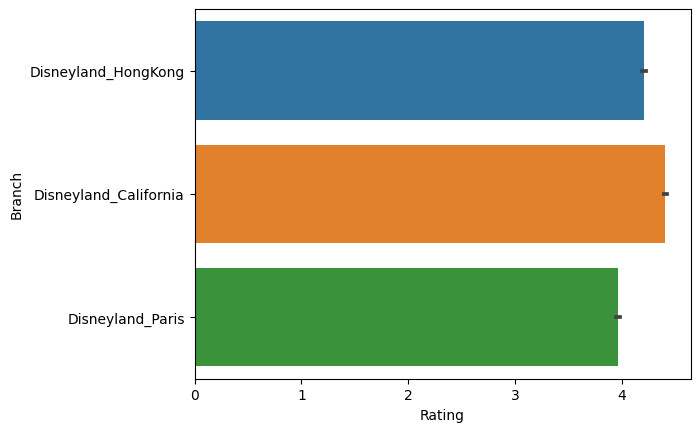

In [11]:
sns.barplot( y=data['Branch' ],x=data['Rating'])

In [12]:
data.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [13]:
data.drop(data.columns[[0,2,3,5]],axis=1 , inplace=True)

In [14]:
data

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."
...,...,...
42651,5,i went to disneyland paris in july 03 and thou...
42652,5,2 adults and 1 child of 11 visited Disneyland ...
42653,5,My eleven year old daughter and myself went to...
42654,4,"This hotel, part of the Disneyland Paris compl..."


In [15]:
data.head()

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."


In [16]:
data =data[['Review_Text','Rating']]

In [17]:
data 

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4
...,...,...
42651,i went to disneyland paris in july 03 and thou...,5
42652,2 adults and 1 child of 11 visited Disneyland ...,5
42653,My eleven year old daughter and myself went to...,5
42654,"This hotel, part of the Disneyland Paris compl...",4


In [18]:
# check null values
data.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

In [19]:
# check duplicated 
data.duplicated().sum()

23

In [20]:
# drop duplicated values
data.drop_duplicates(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10804\4041549193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [21]:
# check duplicated values after drop
data.duplicated().sum()

0

isspace() function is used to check whether all characters in each string are whitespace or not.

In [22]:
# find empty reviews through for loop
blanks = []
for i in data['Review_Text']:
    if i.isspace()== True:
        blanks.append(i)

In [23]:
print(blanks)

[]


In [24]:
def rating(rating):
    if rating > 2 and rating <=5 :
        return "Postive"
    if rating >0 and  rating <=2:
        return("Negative")

In [25]:
# add new columns for postive and negative review
data['Rating_posorneg'] = data['Rating'].apply(rating)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10804\1926791638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rating_posorneg'] = data['Rating'].apply(rating)


In [26]:
# check postive and negative Rview
data

,Review_Text,Rating,Rating_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Postive
1,Its been a while since d last time we visit HK...,4,Postive
2,Thanks God it wasn t too hot or too humid wh...,4,Postive
3,HK Disneyland is a great compact park. Unfortu...,4,Postive
4,"the location is not in the city, took around 1...",4,Postive
...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Postive
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Postive
42653,My eleven year old daughter and myself went to...,5,Postive
42654,"This hotel, part of the Disneyland Paris compl...",4,Postive


In [27]:
data.head(10)

,Review_Text,Rating,Rating_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Postive
1,Its been a while since d last time we visit HK...,4,Postive
2,Thanks God it wasn t too hot or too humid wh...,4,Postive
3,HK Disneyland is a great compact park. Unfortu...,4,Postive
4,"the location is not in the city, took around 1...",4,Postive
5,"Have been to Disney World, Disneyland Anaheim ...",3,Postive
6,Great place! Your day will go by and you won't...,5,Postive
7,Think of it as an intro to Disney magic for th...,3,Postive
8,"Feel so let down with this place,the Disneylan...",2,Negative
9,I can go on talking about Disneyland. Whatever...,5,Postive


### pip install nltk

NLTK is Natural Language Tool Kit. It is used to build python programming. It helps to work with human languages data. It gives a very easy user interface. It supports classification, steaming, tagging, etc.

In [28]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


True

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentanalyze =SentimentIntensityAnalyzer()

In [30]:
review ="This is a ice day. I love this day"

In [31]:
sentanalyze.polarity_scores(review)

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

In [32]:
data['Scores'] = data['Review_Text'].apply(lambda review : sentanalyze.polarity_scores(review))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10804\3893045208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Scores'] = data['Review_Text'].apply(lambda review : sentanalyze.polarity_scores(review))


In [34]:
data

,Review_Text,Rating,Rating_posorneg,Scores
0,If you've ever been to Disneyland anywhere you...,4,Postive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,4,Postive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,4,Postive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,4,Postive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...",4,Postive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."
...,...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Postive,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Postive,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com..."
42653,My eleven year old daughter and myself went to...,5,Postive,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co..."
42654,"This hotel, part of the Disneyland Paris compl...",4,Postive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp..."


In [49]:
data['compound'] = data['Scores'].apply(lambda f : f['compound'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10804\3202404207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compound'] = data['Scores'].apply(lambda f : f['compound'])


In [50]:
data

,Review_Text,Rating,Rating_posorneg,Scores,compount,compound
0,If you've ever been to Disneyland anywhere you...,4,Postive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,0.7069
1,Its been a while since d last time we visit HK...,4,Postive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,0.9901
2,Thanks God it wasn t too hot or too humid wh...,4,Postive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,0.9920
3,HK Disneyland is a great compact park. Unfortu...,4,Postive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,0.8489
4,"the location is not in the city, took around 1...",4,Postive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,0.2846
...,...,...,...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Postive,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.9860,0.9860
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Postive,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...",0.9909,0.9909
42653,My eleven year old daughter and myself went to...,5,Postive,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...",0.8402,0.8402
42654,"This hotel, part of the Disneyland Paris compl...",4,Postive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.9538,0.9538


In [51]:
data['compound_posorneg'] = data['compound'].apply( lambda score: "Postive" if score >= 0 else "Negative")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10804\2439966605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['compound_posorneg'] = data['compound'].apply( lambda score: "Postive" if score >= 0 else "Negative")


In [52]:
data

,Review_Text,Rating,Rating_posorneg,Scores,compount,compound,compound_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Postive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,0.7069,Postive
1,Its been a while since d last time we visit HK...,4,Postive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,0.9901,Postive
2,Thanks God it wasn t too hot or too humid wh...,4,Postive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,0.9920,Postive
3,HK Disneyland is a great compact park. Unfortu...,4,Postive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,0.8489,Postive
4,"the location is not in the city, took around 1...",4,Postive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,0.2846,Postive
...,...,...,...,...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Postive,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.9860,0.9860,Postive
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Postive,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...",0.9909,0.9909,Postive
42653,My eleven year old daughter and myself went to...,5,Postive,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...",0.8402,0.8402,Postive
42654,"This hotel, part of the Disneyland Paris compl...",4,Postive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.9538,0.9538,Postive


In [58]:
examplereviw =" I didn't liked the disneyland . i am never coming back again"

In [59]:
sentanalyze.polarity_scores(examplereviw)

{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.3252}

In [66]:
postive =" Great disneyland"

In [67]:
sentanalyze.polarity_scores(postive)

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [68]:
data

,Review_Text,Rating,Rating_posorneg,Scores,compount,compound,compound_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Postive,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,0.7069,Postive
1,Its been a while since d last time we visit HK...,4,Postive,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,0.9901,Postive
2,Thanks God it wasn t too hot or too humid wh...,4,Postive,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,0.9920,Postive
3,HK Disneyland is a great compact park. Unfortu...,4,Postive,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,0.8489,Postive
4,"the location is not in the city, took around 1...",4,Postive,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,0.2846,Postive
...,...,...,...,...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Postive,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.9860,0.9860,Postive
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Postive,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...",0.9909,0.9909,Postive
42653,My eleven year old daughter and myself went to...,5,Postive,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...",0.8402,0.8402,Postive
42654,"This hotel, part of the Disneyland Paris compl...",4,Postive,"{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...",0.9538,0.9538,Postive


In [69]:
data =data[['Review_Text','Rating','Rating_posorneg']]

In [70]:
data

,Review_Text,Rating,Rating_posorneg
0,If you've ever been to Disneyland anywhere you...,4,Postive
1,Its been a while since d last time we visit HK...,4,Postive
2,Thanks God it wasn t too hot or too humid wh...,4,Postive
3,HK Disneyland is a great compact park. Unfortu...,4,Postive
4,"the location is not in the city, took around 1...",4,Postive
...,...,...,...
42651,i went to disneyland paris in july 03 and thou...,5,Postive
42652,2 adults and 1 child of 11 visited Disneyland ...,5,Postive
42653,My eleven year old daughter and myself went to...,5,Postive
42654,"This hotel, part of the Disneyland Paris compl...",4,Postive


In [71]:
X=data['Review_Text']
y=data['Rating_posorneg']

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [73]:
from sklearn.svm import LinearSVC 
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
textclf = Pipeline([("tfidf",TfidfVectorizer()),('clf',LinearSVC())])

In [78]:
textclf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [79]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

In [80]:
preds = textclf.predict(X_test)

In [81]:
print(accuracy_score(y_test,preds))

0.939157011870069


In [82]:
cm = confusion_matrix(y_test,preds)

print(cm)

[[  576   597]
 [  259 12637]]


In [83]:
import matplotlib 
matplotlib.rc("figure",figsize=(20,10))

In [85]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=[False,True])

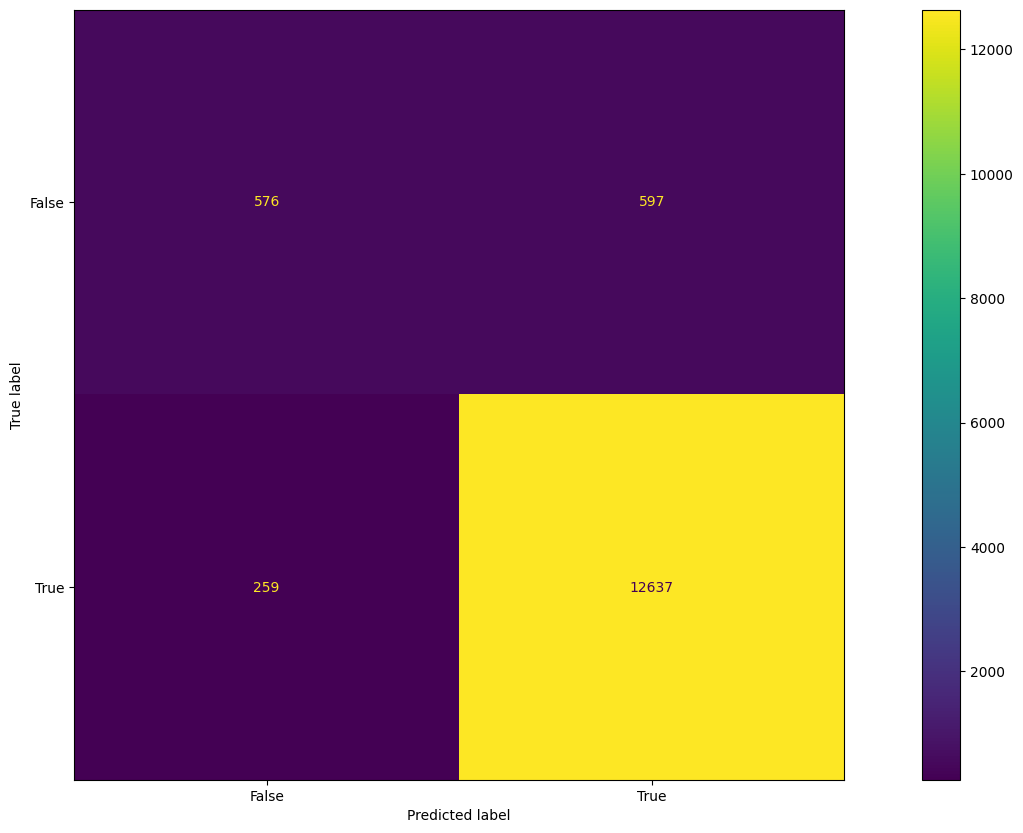

In [86]:
cm_display.plot()
plt.show()

In [95]:
newreview =[("Disneyland was perfect. I like it so much")]

In [96]:
textclf.predict(newreview)

array(['Postive'], dtype=object)